In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [2]:
mnist_train = dsets.MNIST(root = "MNIST_data/", train = True, transform=transforms.ToTensor(), download = True)
mnist_test = dsets.MNIST(root = 'MNIST_data/', train = False, transform = transforms.ToTensor(), download = True)

In [3]:
dataloader = DataLoader(dataset = mnist_train, batch_size = 100, shuffle = True, drop_last= True)

In [4]:
model = nn.Sequential(
    nn.Linear(784, 392, bias = True),
    nn.ReLU(),
    nn.Linear(392, 196, bias = True),
    nn.ReLU(),
    nn.Linear(196, 10, bias = True)
)

In [5]:
optimizer = optim.Adam(model.parameters())
loss_fn = nn.CrossEntropyLoss()
nb_epoch = 100
losses = []

In [6]:
for epoch in range(nb_epoch + 1):
    avg_cost = 0
    for idx, samples in enumerate(dataloader):
        X, Y = samples
        X = X.view(-1, 28*28)
        hypothesis = model(X)
        loss = loss_fn(hypothesis, Y)
        avg_cost += loss /len(dataloader) 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    losses.append(avg_cost)
    if epoch % 10 == 0:
        print("epoch : ", epoch, "cost : ", avg_cost)

epoch :  0 cost :  tensor(0.2839, grad_fn=<AddBackward0>)
epoch :  10 cost :  tensor(0.0104, grad_fn=<AddBackward0>)
epoch :  20 cost :  tensor(0.0049, grad_fn=<AddBackward0>)
epoch :  30 cost :  tensor(0.0047, grad_fn=<AddBackward0>)
epoch :  40 cost :  tensor(0.0038, grad_fn=<AddBackward0>)
epoch :  50 cost :  tensor(0.0029, grad_fn=<AddBackward0>)
epoch :  60 cost :  tensor(0.0007, grad_fn=<AddBackward0>)
epoch :  70 cost :  tensor(3.5255e-06, grad_fn=<AddBackward0>)
epoch :  80 cost :  tensor(6.0929e-08, grad_fn=<AddBackward0>)
epoch :  90 cost :  tensor(4.9512e-09, grad_fn=<AddBackward0>)
epoch :  100 cost :  tensor(4.1525e-10, grad_fn=<AddBackward0>)


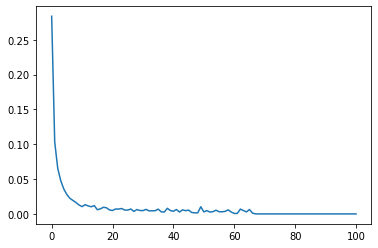

In [8]:
plt.plot(losses)

In [19]:
X_test = mnist_test.data.view(-1, 28*28).float()
Y_test = mnist_test.targets

In [21]:
prediction = model(X_test)
correct_prediction = torch.argmax(prediction, 1) == Y_test
accuarcy = correct_prediction.float().mean()
print(accuarcy)

tensor(0.9853)
